In [1]:
import os
initial_dir = os.getcwd()
print(initial_dir)

/home/kalmar/Mathematics/Research/MPI Tuebingen/TDA-Cause-Effect-Pairs


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import sys
import time

sys.path.append("/home/kalmar/Mathematics/Research/MPI Tuebingen/Dionysus-python3/build/bindings/python")
import dionysus

%reload_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

tda = __import__("TDA")
tsp = __import__("topology-summary-plotter")
out_i = __import__("identify-outliers")
sampler = __import__("points-sampler")
os.chdir(initial_dir)

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/usr/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [3]:
pattern = re.compile('pair00..\.txt')
files = sorted([x for x in os.listdir('./pairs/') if pattern.match(x)])
file_names = []
dir_names = []
for f in files:
    with open("./pairs/" + f) as points:
        x = points.readline()
        if len(x.split()) > 2:
            file_names.append(f)
            dir_names.append(f[:-4])
            
for i, f in enumerate(file_names):
    x = np.loadtxt('./pairs/'+f)
    print(i, f, x.shape)

0 pair0052.txt (10226, 8)
1 pair0053.txt (989, 4)
2 pair0054.txt (392, 5)
3 pair0055.txt (72, 32)
4 pair0071.txt (120, 8)
5 pair0081.txt (365, 3)
6 pair0082.txt (365, 3)
7 pair0083.txt (365, 3)


In [4]:
i = 0
points = np.loadtxt('./test/'+dir_names[i]+"/std_points")
print(points.shape)
points[35]

(1000, 8)


array([-1.17996191, -1.1917694 , -1.19192119, -1.1937901 , -1.19398377,
       -1.18474752, -1.17454669, -1.18031037])

In [5]:
pts = np.array([[0,0], [0,1], [3,0]],dtype=np.float)

In [6]:
from scipy.spatial.distance import cdist
def create_full_complex(points, radius):
        full_complex = dionysus.Filtration()

        full_complex = exact_rips_graph(points, radius)

        full_complex.sort(dionysus.data_dim_cmp)
        logging.info("Created full complex of size %d", full_complex.__len__())
        return full_complex
    
def exact_rips_graph(points, radius):
        
        distances = cdist(points, points)
        simplices = []
        for i in range(points.shape[0]):
            print(i, end=" ", flush=True)
            simplices.append(dionysus.Simplex([i], 0))
            for j in range(points.shape[0]):
                d = distances[i][j]
                if j != i and d <= radius:
                    simplices.append(dionysus.Simplex([i, j], d))
        full_complex = dionysus.Filtration(simplices)
        return full_complex

In [80]:
pts = np.array([])
print(pts)
cmplx = create_full_complex(pts,2)
distances = cdist(pts, pts)
print(distances)

[[ 1.83127488  1.81637924]
 [ 1.81959396  1.78283353]
 [ 0.69764207  0.653364  ]
 [ 0.38050522  0.37303853]]
0 1 2 3 

INFO:root:Created full complex of size 8


[[ 0.          0.03552124  1.62410831  2.04645181]
 [ 0.03552124  0.          1.59200423  2.0145715 ]
 [ 1.62410831  1.59200423  0.          0.42327077]
 [ 2.04645181  2.0145715   0.42327077  0.        ]]


In [81]:
z = tda.FilteredComplex(cmplx)
print(z.inf_life_0)
print(sorted(z.h_0, key=lambda x: x[1]))


[[0, inf]]
[[0, 0.035521240985193617], [0, 0.42327077295400978], [0, 1.624108309859543]]


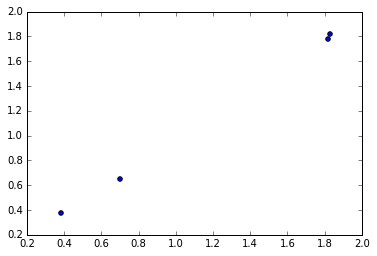

In [82]:
plt.scatter(pts[:,0], pts[:,1])

In [48]:
dist = distance.cdist(points[:500],points[:500])

In [51]:
minimals = np.zeros(dist.shape[0])
for i,row in enumerate(dist):
    row[i] = 999
    minimals[i] = min(row)

max(minimals)

1.7400430818201682

In [15]:
z = tda.FilteredComplex(cmplx.full_complex)
max([x[1] for x in z.h_0])

4.8871183647905854

In [46]:
print(len(z.inf_life_0), len(z.h_0))
print(sorted(z.h_0, key = lambda x : x[1]))

1 499
[[0, 0.022058932831998244], [0, 0.023157660904535502], [0, 0.025886584255853211], [0, 0.028661640056633082], [0, 0.029104571864663281], [0, 0.030924094211291924], [0, 0.032020129449689641], [0, 0.032475212256440747], [0, 0.034475161519118891], [0, 0.036382199352662223], [0, 0.038257464871782783], [0, 0.039584177300775805], [0, 0.03984155581262095], [0, 0.039913920574171292], [0, 0.04158166145938743], [0, 0.044801878883298556], [0, 0.045200189089301492], [0, 0.046986163420005084], [0, 0.048104779115954989], [0, 0.049803955939173021], [0, 0.050143522785341066], [0, 0.050661810906626997], [0, 0.055130687956223806], [0, 0.059032936758216387], [0, 0.059241196996062187], [0, 0.060023609928691546], [0, 0.078152853246547305], [0, 0.079856545354449818], [0, 0.081133747429354489], [0, 0.082877203057813167], [0, 0.086750576274869304], [0, 0.090098554602344907], [0, 0.090098554602344907], [0, 0.09039584158534382], [0, 0.094651501002186472], [0, 0.095875949742288594], [0, 0.096677452591150972

In [ ]:
%prun tda.GeometricComplex(points[500:], full_initialisation=True)

INFO:root:Creating GeometricComplex on 9727 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1
INFO:root:Using Rips-complex with radius 0.353553. This may be slow for dense sets!


In [13]:
%lprun -f tda.GeometricComplex.__create_full_complex__ tda.GeometricComplex(points[500:], full_initialisation=False)

INFO:root:Creating GeometricComplex on 489 points
INFO:root:Variable X range: 0
INFO:root:Variable Y range: 1
INFO:root:Using Rips-complex with radius 2.000000. This may be slow for dense sets!
INFO:root:Created rips full complex of size 79206
INFO:root:The threshold 1.552808 limits the complex size to 77632


In [16]:
%prun x = CEPair("knn")

1 

INFO:root:Creating GeometricComplex on 391 points
INFO:root:Variable X range: 0 1 2
INFO:root:Variable Y range: 3 4
INFO:root:Using Rips-complex. This may be slow for dense sets!
INFO:root:Created rips full complex of size 46160
INFO:root:The threshold 0.495461 limits the complex size to 46079
INFO:root:X-variable: Projecting on 0-th axis
DEBUG:root:Initialising Static Presistence
DEBUG:root:Pairing Simplices
DEBUG:root:Computing Persistence Pairs
DEBUG:root:Undying simplex: <314> at 0.000000
DEBUG:root:Undying simplex: <224> at 1.439417
DEBUG:root:Undying simplex: <195> at 1.468181
DEBUG:root:Undying simplex: <196> at 1.492835
DEBUG:root:Undying simplex: <199> at 1.492835
DEBUG:root:Undying simplex: <202> at 1.587345
DEBUG:root:Undying simplex: <176> at 1.595563
DEBUG:root:Undying simplex: <211> at 1.628436
DEBUG:root:Undying simplex: <192> at 1.817454
DEBUG:root:Undying simplex: <162> at 1.824029
DEBUG:root:Undying simplex: <231> at 1.838000
DEBUG:root:Undying simplex: <185> at 1.838

2 

INFO:root:Creating GeometricComplex on 390 points
INFO:root:Variable X range: 0 1 2
INFO:root:Variable Y range: 3 4
INFO:root:Using Rips-complex. This may be slow for dense sets!


KeyboardInterrupt: 